In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/Salary.csv")
df.columns = ['YearsExperience', 'Salary']

In [3]:
print(df.describe())
print("\nMissing values:\n", df.isnull().sum())

       YearsExperience         Salary
count        35.000000      35.000000
mean          6.308571   83945.600000
std           3.618610   32162.673003
min           1.100000   37731.000000
25%           3.450000   57019.000000
50%           5.300000   81363.000000
75%           9.250000  113223.500000
max          13.500000  139465.000000

Missing values:
 YearsExperience    0
Salary             0
dtype: int64


In [4]:
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0)
}

results = []

In [6]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    cv = np.mean(cross_val_score(model, X, y, cv=5))

    results.append({
        'Model': name,
        'MSE': mse,
        'R2': r2,
        'CV Score': cv,
        'Predictions': preds,
        'Residuals': y_test.values - preds,
        'Fitted Model': model
    })


In [7]:
#Comparison Table
comparison_df = pd.DataFrame(results)[['Model', 'MSE', 'R2', 'CV Score']]
print("\n🔍 Model Performance Comparison:\n", comparison_df)


🔍 Model Performance Comparison:
                Model           MSE        R2  CV Score
0  Linear Regression  5.576179e+07  0.891423 -0.702170
1   Ridge Regression  5.621650e+07  0.890538 -0.677495


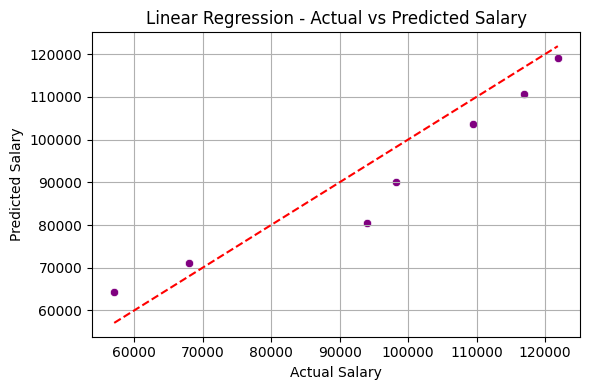

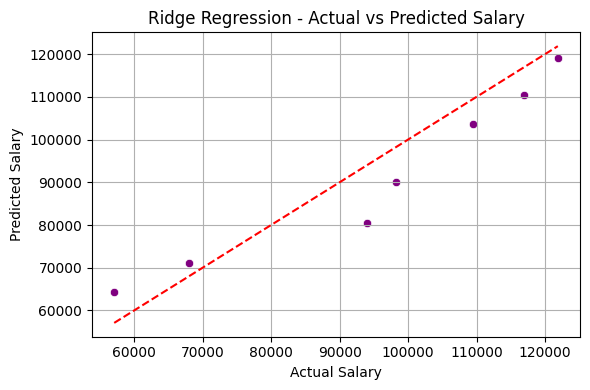

In [8]:
#Prediction vs Actual
for res in results:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=res['Predictions'], color='purple')
    plt.title(f"{res['Model']} - Actual vs Predicted Salary")
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    plt.grid(True)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
    plt.tight_layout()
    plt.show()

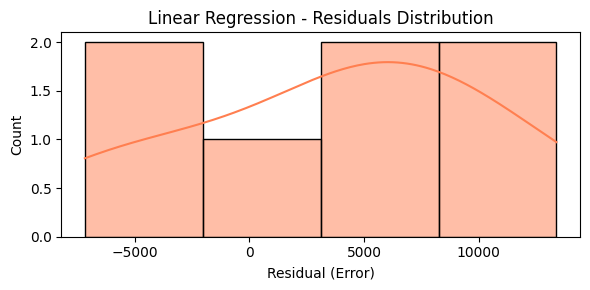

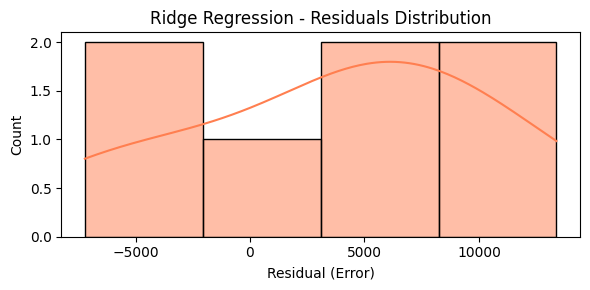

In [9]:

#Residual Plot
for res in results:
    plt.figure(figsize=(6, 3))
    sns.histplot(res['Residuals'], kde=True, color='coral')
    plt.title(f"{res['Model']} - Residuals Distribution")
    plt.xlabel("Residual (Error)")
    plt.tight_layout()
    plt.show()

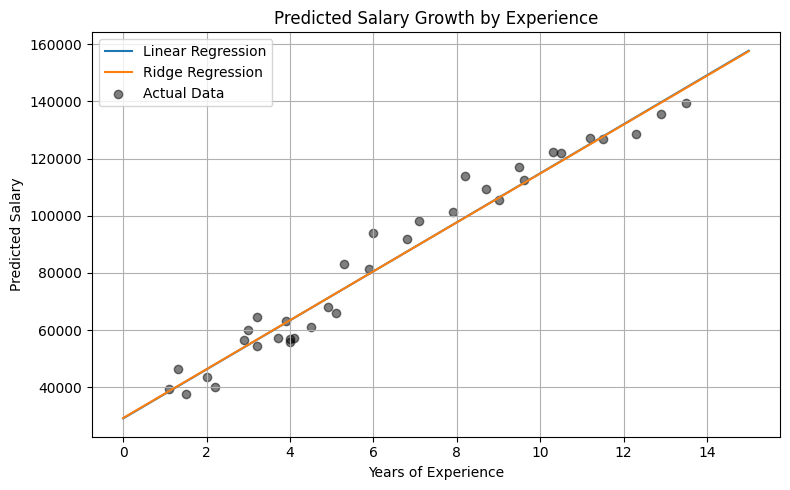

In [10]:
#Future Increments Visualization
future_experience = pd.DataFrame({'YearsExperience': np.linspace(0, 15, 100)})
plt.figure(figsize=(8, 5))
for res in results:
    future_preds = res['Fitted Model'].predict(future_experience)
    plt.plot(future_experience, future_preds, label=res['Model'])

plt.scatter(df['YearsExperience'], df['Salary'], alpha=0.5, color='black', label='Actual Data')
plt.title("Predicted Salary Growth by Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:

best_model = max(results, key=lambda x: x['R2'])
print(f"\nBased on R² and cross-validation, **{best_model['Model']}** is the most reliable model for future salary predictions.")
print("It generalizes better and minimizes prediction error, making it ideal for modeling salary increments over time.")


Based on R² and cross-validation, **Linear Regression** is the most reliable model for future salary predictions.
It generalizes better and minimizes prediction error, making it ideal for modeling salary increments over time.


In [12]:
import joblib


joblib.dump(best_model['Fitted Model'], 'enhanced_salary_model.pkl')

print("Trained model saved as 'enhanced_salary_model.pkl'")


Trained model saved as 'enhanced_salary_model.pkl'
